<a href="https://colab.research.google.com/github/kailash3113/Stock-Prediction/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [23]:
import io

df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
print("Entire dataset strucutre :","\n",df)

Entire dataset strucutre : 
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease 

In [24]:
print(df['ChestPainType'].unique())

['ATA' 'NAP' 'ASY' 'TA']


In [25]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [26]:
df.shape

(918, 12)

In [27]:
print(df.dtypes)
print(df.dtypes.unique())

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
[dtype('int64') dtype('O') dtype('float64')]


In [28]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [29]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

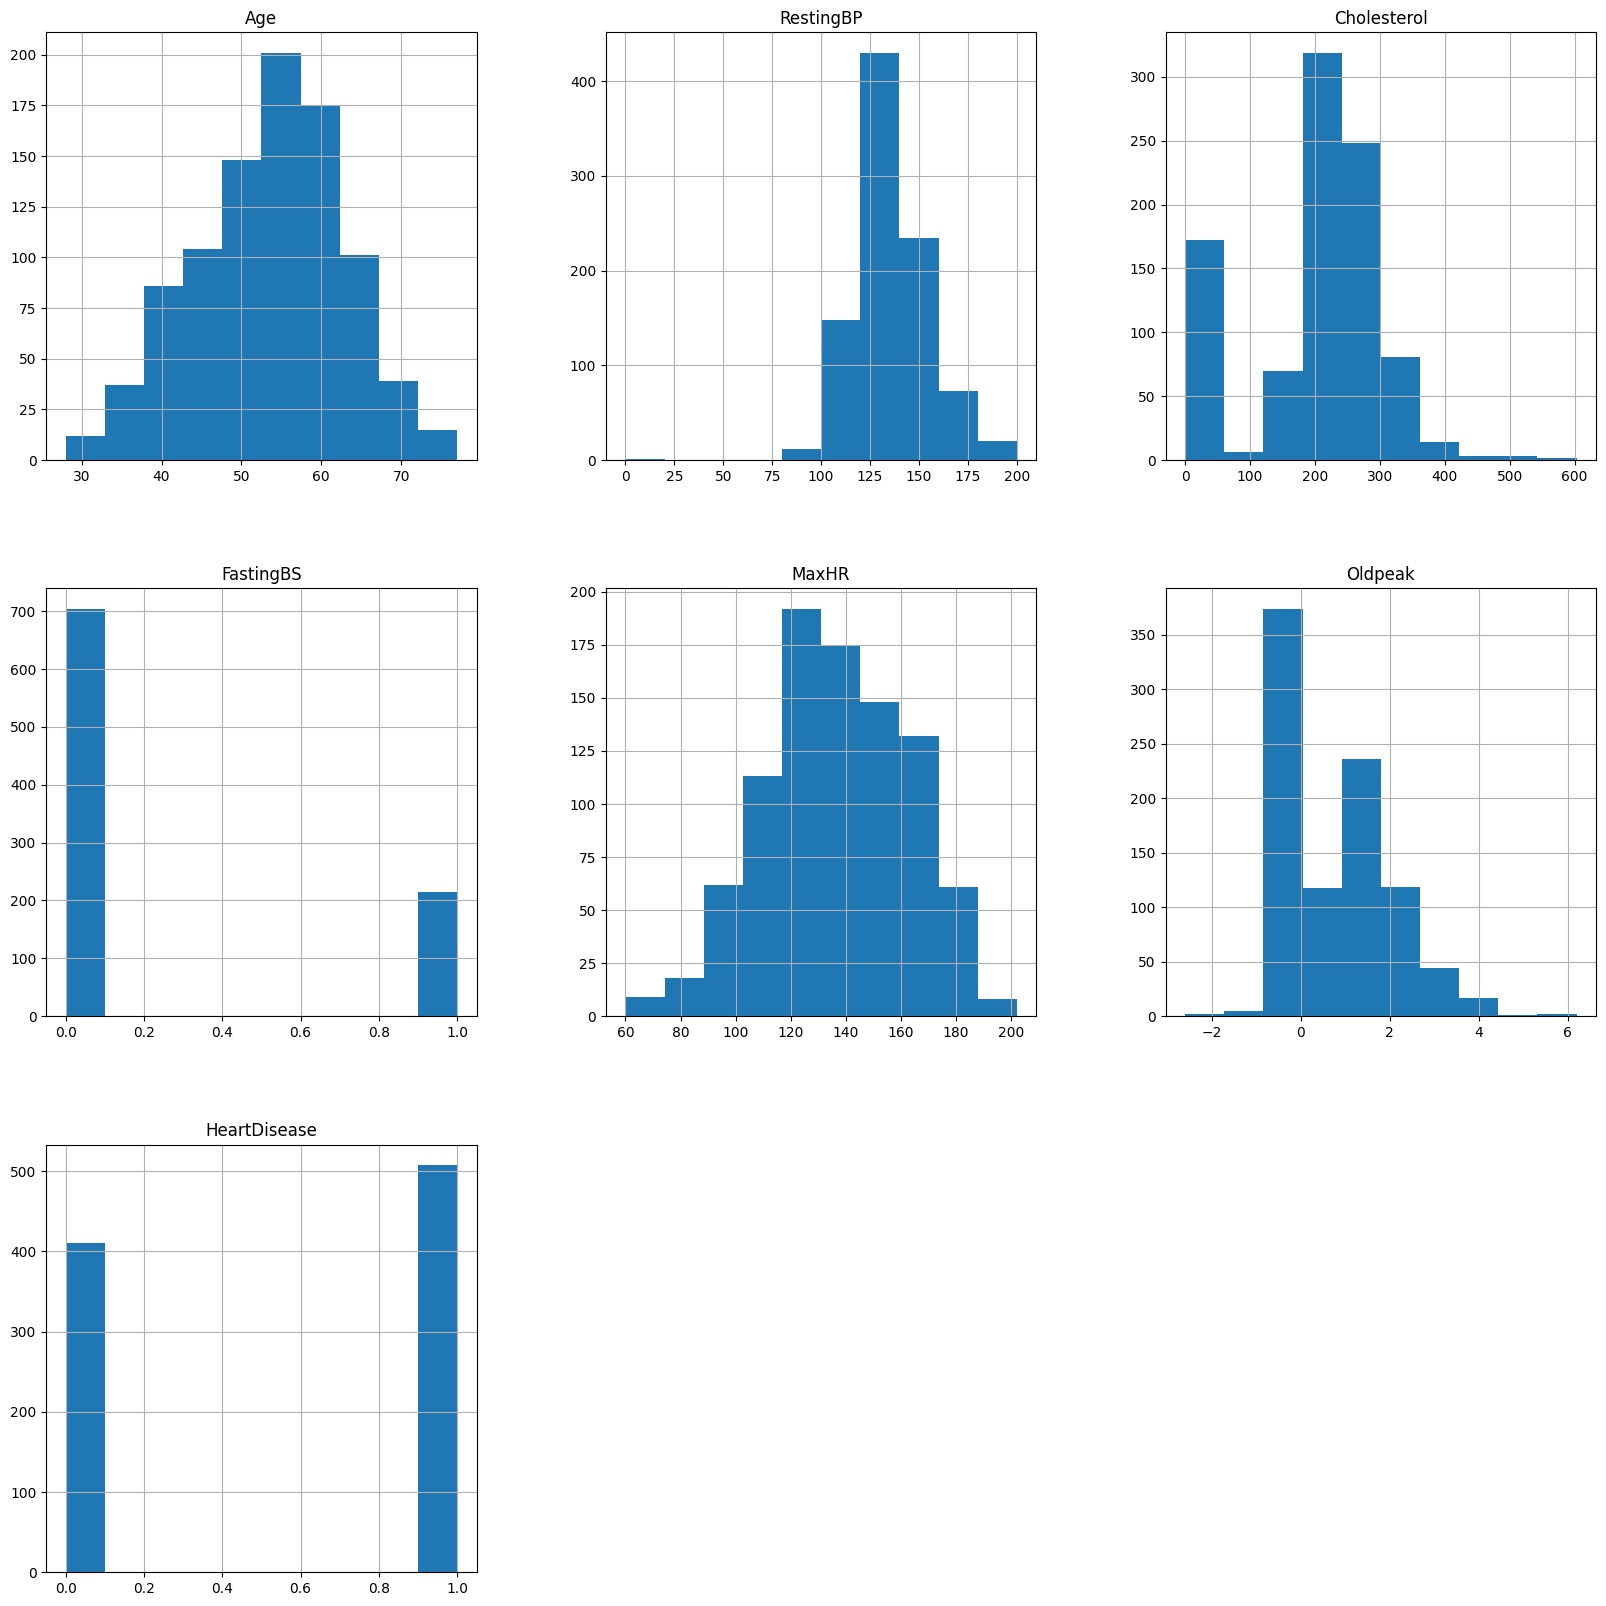

In [30]:
df.hist(figsize=(20,20),bins = 10)

In [31]:
for i in df:
  print(df[i].value_counts())
  print('\n')


54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64


M    725
F    193
Name: Sex, dtype: int64


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64


0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64


0    704
1    214
Name: FastingBS, dtype: int64


Normal    552
LVH

In [32]:
df['Cholesterol'] = df['Cholesterol'].replace(to_replace = 0,value = df['Cholesterol'].mean())
df['Cholesterol'].describe()

count    918.000000
mean     236.047413
std       56.240952
min       85.000000
25%      198.799564
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [33]:
MF = pd.get_dummies(df['Sex'])
MF = MF.drop('F',axis = 'columns')
df['Sex'] = MF

In [34]:
print(df.dtypes) #chest pain, restingECG, STslope

Age                 int64
Sex                 uint8
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [35]:
EA = pd.get_dummies(df['ExerciseAngina'])
EA = EA.drop('N',axis = 'columns')
print(EA)

     Y
0    0
1    0
2    0
3    1
4    0
..  ..
913  0
914  0
915  1
916  0
917  0

[918 rows x 1 columns]


In [36]:
df = pd.concat([df,EA],axis = 1)
print(df)

     Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40    1           ATA        140        289.0          0     Normal   
1     49    0           NAP        160        180.0          0     Normal   
2     37    1           ATA        130        283.0          0         ST   
3     48    0           ASY        138        214.0          0     Normal   
4     54    1           NAP        150        195.0          0     Normal   
..   ...  ...           ...        ...          ...        ...        ...   
913   45    1            TA        110        264.0          0     Normal   
914   68    1           ASY        144        193.0          1     Normal   
915   57    1           ASY        130        131.0          0     Normal   
916   57    0           ATA        130        236.0          0        LVH   
917   38    1           NAP        138        175.0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Y  
0      172  

In [37]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Y
0,40,1,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,0
1,49,0,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,0
2,37,1,ATA,130,283.0,0,ST,98,N,0.0,Up,0,0
3,48,0,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,1
4,54,1,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,0
914,68,1,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1,0
915,57,1,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,1
916,57,0,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1,0


In [38]:
RECG = pd.get_dummies(df['RestingECG'])
print(RECG)

     LVH  Normal  ST
0      0       1   0
1      0       1   0
2      0       0   1
3      0       1   0
4      0       1   0
..   ...     ...  ..
913    0       1   0
914    0       1   0
915    0       1   0
916    1       0   0
917    0       1   0

[918 rows x 3 columns]


In [39]:
RECG = RECG.drop('LVH',axis = 'columns')
df = pd.concat([df,RECG],axis = 1)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Y,Normal,ST
0,40,1,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,0,1,0
1,49,0,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,0,1,0
2,37,1,ATA,130,283.0,0,ST,98,N,0.0,Up,0,0,0,1
3,48,0,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,1,1,0
4,54,1,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,0,1,0
914,68,1,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1,0,1,0
915,57,1,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,1,1,0
916,57,0,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1,0,0,0


In [40]:
df = df.drop('RestingECG',axis = 'columns')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Y,Normal,ST
0,40,1,ATA,140,289.0,0,172,N,0.0,Up,0,0,1,0
1,49,0,NAP,160,180.0,0,156,N,1.0,Flat,1,0,1,0
2,37,1,ATA,130,283.0,0,98,N,0.0,Up,0,0,0,1
3,48,0,ASY,138,214.0,0,108,Y,1.5,Flat,1,1,1,0
4,54,1,NAP,150,195.0,0,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264.0,0,132,N,1.2,Flat,1,0,1,0
914,68,1,ASY,144,193.0,1,141,N,3.4,Flat,1,0,1,0
915,57,1,ASY,130,131.0,0,115,Y,1.2,Flat,1,1,1,0
916,57,0,ATA,130,236.0,0,174,N,0.0,Flat,1,0,0,0


In [41]:
STS = pd.get_dummies(df['ST_Slope'])
STS

,Down,Flat,Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,0,1,0


In [42]:
STS = STS.drop('Down',axis = 'columns')
df = pd.concat([df,STS],axis = 1)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Y,Normal,ST,Flat,Up
0,40,1,ATA,140,289.0,0,172,N,0.0,Up,0,0,1,0,0,1
1,49,0,NAP,160,180.0,0,156,N,1.0,Flat,1,0,1,0,1,0
2,37,1,ATA,130,283.0,0,98,N,0.0,Up,0,0,0,1,0,1
3,48,0,ASY,138,214.0,0,108,Y,1.5,Flat,1,1,1,0,1,0
4,54,1,NAP,150,195.0,0,122,N,0.0,Up,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264.0,0,132,N,1.2,Flat,1,0,1,0,1,0
914,68,1,ASY,144,193.0,1,141,N,3.4,Flat,1,0,1,0,1,0
915,57,1,ASY,130,131.0,0,115,Y,1.2,Flat,1,1,1,0,1,0
916,57,0,ATA,130,236.0,0,174,N,0.0,Flat,1,0,0,0,1,0


In [43]:
df = df.drop('ST_Slope',axis = 'columns')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Y,Normal,ST,Flat,Up
0,40,1,ATA,140,289.0,0,172,N,0.0,0,0,1,0,0,1
1,49,0,NAP,160,180.0,0,156,N,1.0,1,0,1,0,1,0
2,37,1,ATA,130,283.0,0,98,N,0.0,0,0,0,1,0,1
3,48,0,ASY,138,214.0,0,108,Y,1.5,1,1,1,0,1,0
4,54,1,NAP,150,195.0,0,122,N,0.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264.0,0,132,N,1.2,1,0,1,0,1,0
914,68,1,ASY,144,193.0,1,141,N,3.4,1,0,1,0,1,0
915,57,1,ASY,130,131.0,0,115,Y,1.2,1,1,1,0,1,0
916,57,0,ATA,130,236.0,0,174,N,0.0,1,0,0,0,1,0


In [44]:
CP = pd.get_dummies(df['ChestPainType'])
CP

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [45]:
CP = CP.drop('TA',axis = 'columns')
df = pd.concat([df,CP],axis = 1)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Y,Normal,ST,Flat,Up,ASY,ATA,NAP
0,40,1,ATA,140,289.0,0,172,N,0.0,0,0,1,0,0,1,0,1,0
1,49,0,NAP,160,180.0,0,156,N,1.0,1,0,1,0,1,0,0,0,1
2,37,1,ATA,130,283.0,0,98,N,0.0,0,0,0,1,0,1,0,1,0
3,48,0,ASY,138,214.0,0,108,Y,1.5,1,1,1,0,1,0,1,0,0
4,54,1,NAP,150,195.0,0,122,N,0.0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264.0,0,132,N,1.2,1,0,1,0,1,0,0,0,0
914,68,1,ASY,144,193.0,1,141,N,3.4,1,0,1,0,1,0,1,0,0
915,57,1,ASY,130,131.0,0,115,Y,1.2,1,1,1,0,1,0,1,0,0
916,57,0,ATA,130,236.0,0,174,N,0.0,1,0,0,0,1,0,0,1,0


In [46]:
df = df.drop('ChestPainType',axis = 'columns')
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Y,Normal,ST,Flat,Up,ASY,ATA,NAP
0,40,1,140,289.0,0,172,N,0.0,0,0,1,0,0,1,0,1,0
1,49,0,160,180.0,0,156,N,1.0,1,0,1,0,1,0,0,0,1
2,37,1,130,283.0,0,98,N,0.0,0,0,0,1,0,1,0,1,0
3,48,0,138,214.0,0,108,Y,1.5,1,1,1,0,1,0,1,0,0
4,54,1,150,195.0,0,122,N,0.0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264.0,0,132,N,1.2,1,0,1,0,1,0,0,0,0
914,68,1,144,193.0,1,141,N,3.4,1,0,1,0,1,0,1,0,0
915,57,1,130,131.0,0,115,Y,1.2,1,1,1,0,1,0,1,0,0
916,57,0,130,236.0,0,174,N,0.0,1,0,0,0,1,0,0,1,0


In [47]:
EA = pd.get_dummies(df['ExerciseAngina'])
EA

,N,Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
913,1,0
914,1,0
915,0,1
916,1,0


In [48]:
EA = EA.drop('Y',axis = 'columns')
df = pd.concat([df,EA],axis = 1)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Y,Normal,ST,Flat,Up,ASY,ATA,NAP,N
0,40,1,140,289.0,0,172,N,0.0,0,0,1,0,0,1,0,1,0,1
1,49,0,160,180.0,0,156,N,1.0,1,0,1,0,1,0,0,0,1,1
2,37,1,130,283.0,0,98,N,0.0,0,0,0,1,0,1,0,1,0,1
3,48,0,138,214.0,0,108,Y,1.5,1,1,1,0,1,0,1,0,0,0
4,54,1,150,195.0,0,122,N,0.0,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264.0,0,132,N,1.2,1,0,1,0,1,0,0,0,0,1
914,68,1,144,193.0,1,141,N,3.4,1,0,1,0,1,0,1,0,0,1
915,57,1,130,131.0,0,115,Y,1.2,1,1,1,0,1,0,1,0,0,0
916,57,0,130,236.0,0,174,N,0.0,1,0,0,0,1,0,0,1,0,1


In [49]:
df = df.drop('ExerciseAngina',axis = 'columns')
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Y,Normal,ST,Flat,Up,ASY,ATA,NAP,N
0,40,1,140,289.0,0,172,0.0,0,0,1,0,0,1,0,1,0,1
1,49,0,160,180.0,0,156,1.0,1,0,1,0,1,0,0,0,1,1
2,37,1,130,283.0,0,98,0.0,0,0,0,1,0,1,0,1,0,1
3,48,0,138,214.0,0,108,1.5,1,1,1,0,1,0,1,0,0,0
4,54,1,150,195.0,0,122,0.0,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264.0,0,132,1.2,1,0,1,0,1,0,0,0,0,1
914,68,1,144,193.0,1,141,3.4,1,0,1,0,1,0,1,0,0,1
915,57,1,130,131.0,0,115,1.2,1,1,1,0,1,0,1,0,0,0
916,57,0,130,236.0,0,174,0.0,1,0,0,0,1,0,0,1,0,1


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'HeartDisease'}>],
       [<Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'Normal'}>,
        <Axes: title={'center': 'ST'}>, <Axes: title={'center': 'Flat'}>],
       [<Axes: title={'center': 'Up'}>, <Axes: title={'center': 'ASY'}>,
        <Axes: title={'center': 'ATA'}>, <Axes: title={'center': 'NAP'}>],
       [<Axes: title={'center': 'N'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

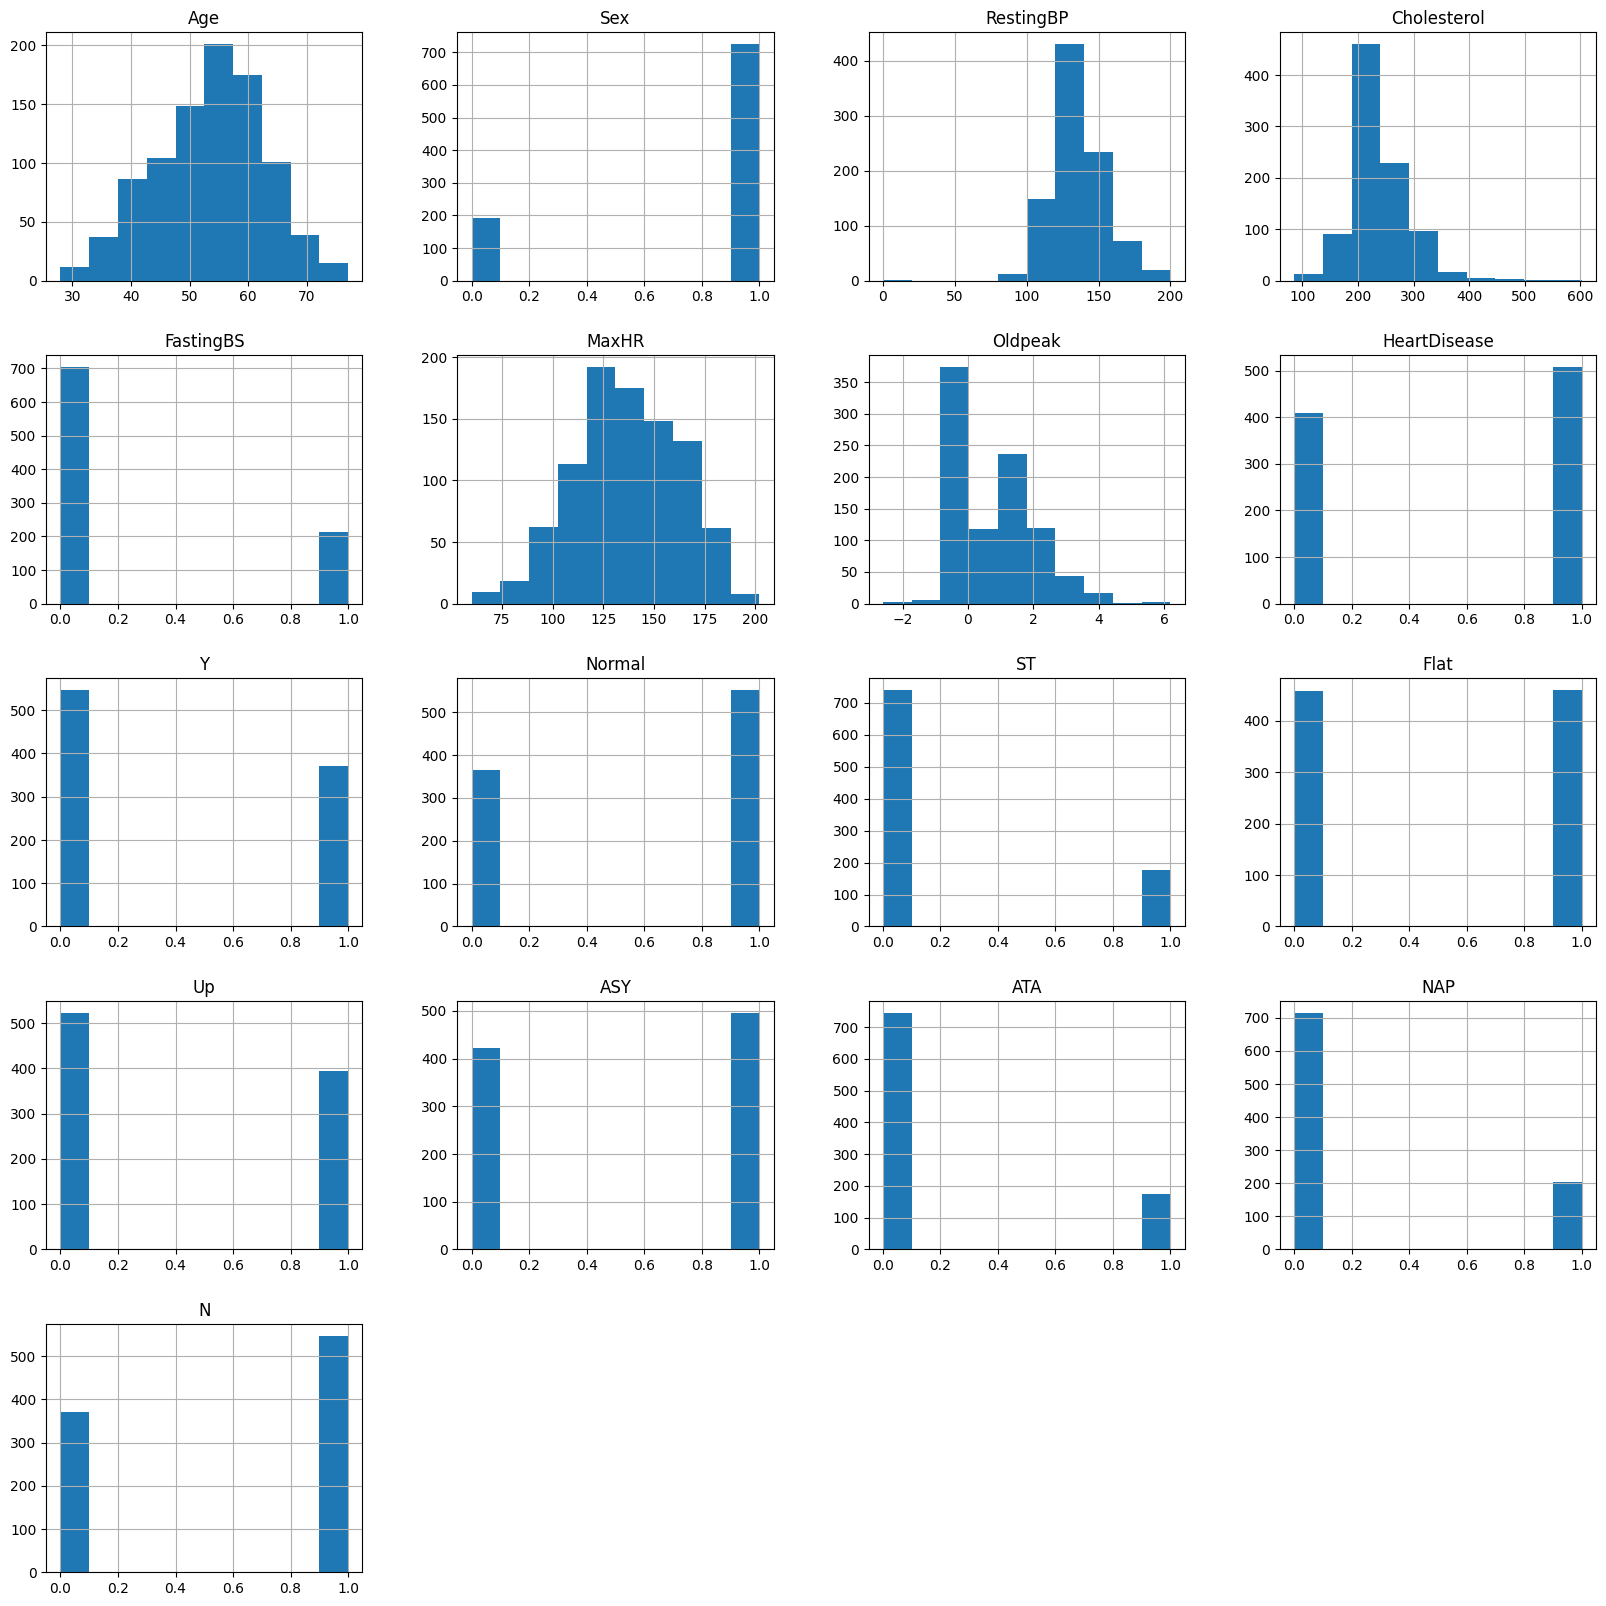

In [97]:
df.hist(figsize = (20,20))

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Y = df['HeartDisease']
X = df.drop('HeartDisease',axis = 'columns')

from sklearn.preprocessing import StandardScaler

SC = StandardScaler()

X = SC.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

y_pred = DTC.predict(x_test)


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

rfc_y_pred = rfc.predict(x_test)

As2 = accuracy_score(rfc_y_pred,y_test)

print("The accuracy of Decision tree :",As2*100)

The accuracy of Decision tree : 84.78260869565217


In [94]:
As = accuracy_score(y_pred,y_test)

print("The accuracy score of the model is :",As*100)

The accuracy score of the model is : 77.17391304347827


In [91]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred,y_test)


<Axes: >

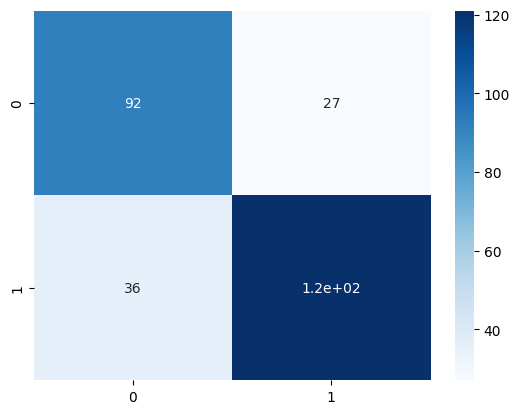

In [92]:
import seaborn as sns
sns.heatmap(cm,annot = True , cmap = 'Blues')